# Projeto Análise de Dados

Projeto de fim do módulo de análise de dados do curso Cientista de Dados - EBAC

**Objetivo:** 
- Entender a relação entre valor de transações e limite de crédito.

## Importações
Importações das bibliotecas e do arquivo a ser analisado.

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('dados_credito.csv')

## 1. Exploração dos Dados
Para verificar se a importação foi bem sucedida, printo as primeiras linhas.

In [53]:
df.head(2)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33


## 1.1. Obtendo informações
Para entender melhor os dados, procuro:
- Nome de suas colunas;
- O volume de dados;
- Informação sobre os tipos de dados das colunas;
- Procuro saber se há dados ausentes.

In [54]:
colunas = df.columns
print(colunas)

Index(['id', 'default', 'idade', 'sexo', 'dependentes', 'escolaridade',
       'estado_civil', 'salario_anual', 'tipo_cartao',
       'meses_de_relacionamento', 'qtd_produtos', 'iteracoes_12m',
       'meses_inativo_12m', 'limite_credito', 'valor_transacoes_12m',
       'qtd_transacoes_12m'],
      dtype='object')


In [55]:
#Linhas[0], colunas[1]
linhas_col = df.shape
print(linhas_col)

(10127, 16)


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             10127 non-null  object
 6   estado_civil             10127 non-null  object
 7   salario_anual            10127 non-null  object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

In [57]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade               False
estado_civil               False
salario_anual              False
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

tipo_cartao
blue        9436
silver       555
gold         116
platinum      20
Name: count, dtype: int64


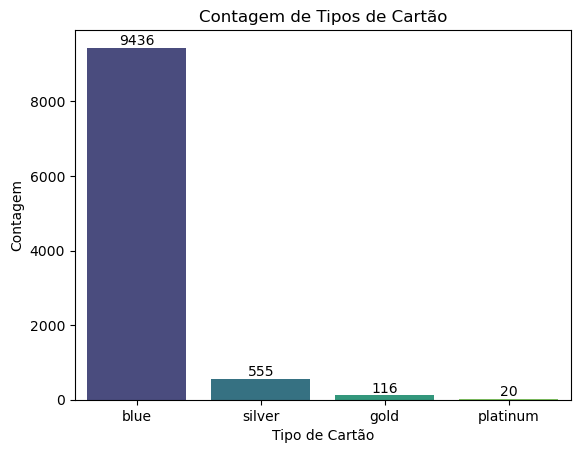

In [58]:
contagem_cartao = df['tipo_cartao'].value_counts()
print(contagem_cartao)

# Criar um gráfico de barras corrigido
sns.barplot(x=contagem_cartao.index, y=contagem_cartao.values, hue=contagem_cartao.index, palette='viridis', dodge=False, legend=False)

# Adicionar os valores acima das barras
for i, value in enumerate(contagem_cartao.values):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Contagem de Tipos de Cartão')
plt.xlabel('Tipo de Cartão')
plt.ylabel('Contagem')
plt.show()

In [59]:
contagem_escolaridade = df['escolaridade'].value_counts()
print(contagem_escolaridade)

escolaridade
mestrado               3128
ensino medio           2013
na                     1519
sem educacao formal    1487
graduacao              1013
doutorado               967
Name: count, dtype: int64


## 1.2. Valores inconsistentes
A exploração busca nas colunas valores inadequados para análise.

Como encontrei o valor 'na', procurei saber onde mais havia esse valor.

In [60]:
contador = 0

for coluna in df.columns:
    for valor in df[coluna]:
        if valor == "na":
            contador += 1

print(f"Foram encontrados {contador} valores 'na' no arquivo CSV.")

Foram encontrados 3380 valores 'na' no arquivo CSV.


In [61]:
contagem_por_coluna = {}

for coluna in df.columns:

    contagem = 0
    
    for valor in df[coluna]:
        if valor == "na":
            contagem += 1
               
    contagem_por_coluna[coluna] = contagem
    

for coluna, contagem in contagem_por_coluna.items():
    print(f"Foram encontrados {contagem} valores 'na' na coluna '{coluna}'.")
    print('__')

Foram encontrados 0 valores 'na' na coluna 'id'.
__
Foram encontrados 0 valores 'na' na coluna 'default'.
__
Foram encontrados 0 valores 'na' na coluna 'idade'.
__
Foram encontrados 0 valores 'na' na coluna 'sexo'.
__
Foram encontrados 0 valores 'na' na coluna 'dependentes'.
__
Foram encontrados 1519 valores 'na' na coluna 'escolaridade'.
__
Foram encontrados 749 valores 'na' na coluna 'estado_civil'.
__
Foram encontrados 1112 valores 'na' na coluna 'salario_anual'.
__
Foram encontrados 0 valores 'na' na coluna 'tipo_cartao'.
__
Foram encontrados 0 valores 'na' na coluna 'meses_de_relacionamento'.
__
Foram encontrados 0 valores 'na' na coluna 'qtd_produtos'.
__
Foram encontrados 0 valores 'na' na coluna 'iteracoes_12m'.
__
Foram encontrados 0 valores 'na' na coluna 'meses_inativo_12m'.
__
Foram encontrados 0 valores 'na' na coluna 'limite_credito'.
__
Foram encontrados 0 valores 'na' na coluna 'valor_transacoes_12m'.
__
Foram encontrados 0 valores 'na' na coluna 'qtd_transacoes_12m'.
_


## 2. Transfomação e Limpeza

In [62]:
df['limite_credito'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10127 entries, 0 to 10126
Series name: limite_credito
Non-Null Count  Dtype 
--------------  ----- 
10127 non-null  object
dtypes: object(1)
memory usage: 79.2+ KB


## 2.1. Correção do Schema

In [63]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [64]:
df[['limite_credito', 'valor_transacoes_12m']].head(5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


- Convertendo colunas tipo **object** para **float**.

In [65]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))


In [66]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

In [67]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          float64
valor_transacoes_12m    float64
dtype: object

In [68]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,10127,6,mestrado,3128
estado_civil,10127,4,casado,4687
salario_anual,10127,6,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


## 2.2. Remoção dos dados inconsistentes

In [69]:
df.dropna(inplace=True)

In [70]:
df.shape

(10127, 16)

In [71]:
df[df['default'] == 0].shape

(8500, 16)

In [72]:
df[df['default'] == 1].shape

(1627, 16)

## 3. Visualização dos Dados

In [73]:
dados_colunas = df[['limite_credito','valor_transacoes_12m']].describe()
print(dados_colunas)

       limite_credito  valor_transacoes_12m
count    10127.000000          10127.000000
mean      8632.440165           4404.583047
std       9088.788041           3397.128078
min       1438.000000            510.160000
25%       2555.355000           2155.825000
50%       4549.420000           3899.590000
75%      11068.175000           4741.310000
max      34516.990000          18484.930000


- A função abaixo apresenta o menor e maior valor de **limite de crédito** e **valor de transações**. 

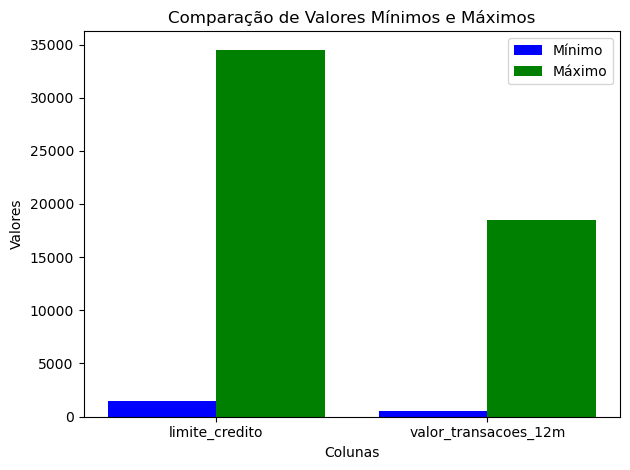

In [74]:
def min_max_coluna(df, coluna): # Função para calcular o mínimo e máximo

    menor_valor = df[coluna].min()
    maior_valor = df[coluna].max()
    
    return (menor_valor, maior_valor)

# Obter valores mínimos e máximos
colunas = ['limite_credito', 'valor_transacoes_12m']
valores_min_max = {coluna: min_max_coluna(df, coluna) for coluna in colunas}

# Preparar os dados para o gráfico
labels = valores_min_max.keys()
min_values = [valores[0] for valores in valores_min_max.values()]
max_values = [valores[1] for valores in valores_min_max.values()]

# Criar o gráfico de barras comparativo
x = range(len(labels))
width = 0.4

plt.bar(x, min_values, width=width, label='Mínimo', color='blue', align='center')
plt.bar([i + width for i in x], max_values, width=width, label='Máximo', color='green', align='center')

# Adicionar rótulos e título
plt.xlabel('Colunas')
plt.ylabel('Valores')
plt.title('Comparação de Valores Mínimos e Máximos')
plt.xticks([i + width / 2 for i in x], labels)
plt.legend()
plt.tight_layout()
plt.show()

In [75]:
# Valores descritivos
for coluna in colunas:
    valores = min_max_coluna(df, coluna)
    print(f"Os valores mínimo e máximo na coluna '{coluna}' são:", valores)

Os valores mínimo e máximo na coluna 'limite_credito' são: (1438.0, 34516.99)
Os valores mínimo e máximo na coluna 'valor_transacoes_12m' são: (510.16, 18484.93)


## 3.1. Comparação de Colunas
O objetivo é expor a soma do valor de transações para cada tipo de cartão, e por fim a média de limite de crédito de cada tipo de cartão.

In [76]:
print(contagem_cartao)

tipo_cartao
blue        9436
silver       555
gold         116
platinum      20
Name: count, dtype: int64


In [77]:
somas_cartao = df.groupby('tipo_cartao')['valor_transacoes_12m'].sum()

print(somas_cartao)

tipo_cartao
blue        39875634.84
gold          891587.61
platinum      180004.60
silver       3657985.47
Name: valor_transacoes_12m, dtype: float64


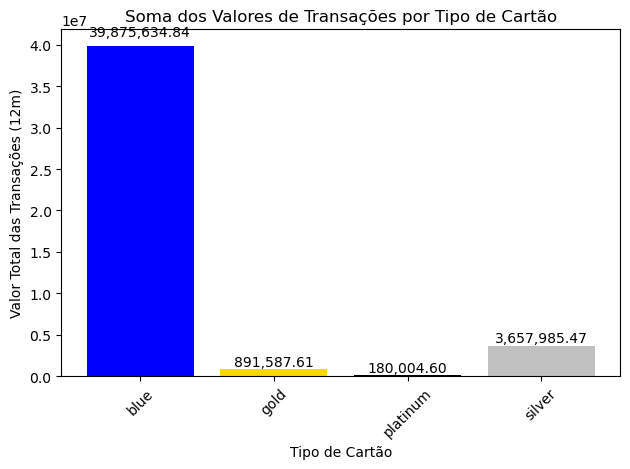

In [78]:
# Dados fornecidos
somas_cartao = {'blue': 39875634.84, 
                'gold': 891587.61,
                'platinum': 180004.60,
                'silver': 3657985.47}

# Cores para as barras
cores = ['blue', 'gold', 'black', 'silver']

# Criar o gráfico de barras
plt.bar(somas_cartao.keys(), somas_cartao.values(), color=cores)

# Adicionar os valores acima das barras
for i, value in enumerate(somas_cartao.values()):
    plt.text(i, value + (value * 0.02), f'{value:,.2f}', ha='center', va='bottom')

# Títulos e rótulos
plt.title('Soma dos Valores de Transações por Tipo de Cartão')
plt.xlabel('Tipo de Cartão')
plt.ylabel('Valor Total das Transações (12m)')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo X para melhor visualização
plt.tight_layout()  # Ajustar layout para evitar cortes

# Exibir o gráfico
plt.show()


## 3.2. Média de Limite de Crédito

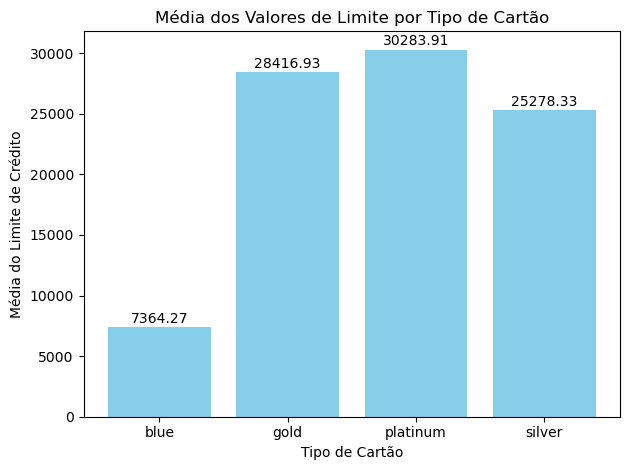

In [79]:
# Calcular a média do limite de crédito para cada tipo de cartão
average_limits = df.groupby('tipo_cartao')['limite_credito'].mean()

# Criar o gráfico de barras
plt.bar(average_limits.index, average_limits.values, color='skyblue')

# Adicionar os valores acima das barras
for i, value in enumerate(average_limits.values):
    plt.text(i, value + 100, f'{value:.2f}', ha='center', va='bottom')

plt.title('Média dos Valores de Limite por Tipo de Cartão')
plt.xlabel('Tipo de Cartão')
plt.ylabel('Média do Limite de Crédito')
plt.tight_layout()
plt.show()

## 4.Conclusão
A soma do valor de transação do cartão tipo **'blue'** é consideravelmente grande. Mesmo assim, no aspecto geral, é o que contém a menor média de limite de crédito.

O cartão **platinum** destaca-se com o maior limite de crédito, porém com a menor taxa de aquisição, apenas 20 clientes.

